<a href="https://colab.research.google.com/github/imprincesarraf/face-detection-face-recognition-and-emotion-detection/blob/main/face_recognition_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install face_recognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=d4135ce3fa5b1b724d040fa298cda899170f8a8a220df15a283e693715c9ba27
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [5]:
import face_recognition 
import cv2 


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from PIL import Image
import face_recognition
image=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/groups/team1.jpg')
face_locations=face_recognition.face_locations(image)
#print(face_locations)

for face_location in face_locations:
  top,right,bottom,left=face_location
  face_image=image[top:bottom,left:right]
  pil_image=Image.fromarray(face_image)
  pil_image.show()
  pil_image.save(f'{top}.jpg')

In [8]:
import face_recognition
from PIL import Image,ImageDraw




In [9]:
import face_recognition
img_of_bill=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/known/Bill Gates.jpg')
bill_face_encoding=face_recognition.face_encodings(img_of_bill)[0]

img_of_steve=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/known/Steve Jobs.jpg')
steve_face_encoding=face_recognition.face_encodings(img_of_steve)[0]

img_of_elon=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/known/Elon Musk.png')
elon_face_encoding=face_recognition.face_encodings(img_of_elon)[0]






/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [10]:
#create array of encodings and names
known_face_encodings=[
                      bill_face_encoding,steve_face_encoding,elon_face_encoding
]

known_face_names=["Bill Gates",
                  "Steve Jobs","Elon Musk"]

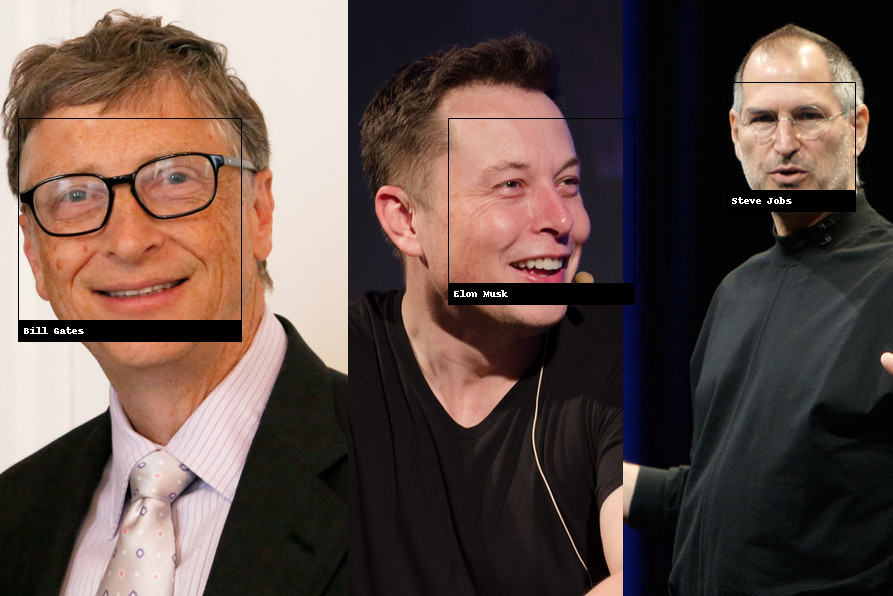

In [12]:
#load test image to find faces in
test_image=face_recognition.load_image_file('/content/drive/MyDrive/face_recognition/groups/bill-steve-elon.png')

#find faces in test image
face_locations=face_recognition.face_locations(test_image)
face_encodings=face_recognition.face_encodings(test_image,face_locations)

#Convert to PIL format
pil_image=Image.fromarray(test_image)
#create a ImageDraw instance
draw=ImageDraw.Draw(pil_image)

#loop through faces im test image
for(top,right,bottom,left),face_encoding in zip(face_locations,face_encodings):
  matches=face_recognition.compare_faces(known_face_encodings,face_encoding)

  name="Unknown Person"

  #if match
  if True in matches:
    first_match_index=matches.index(True)
    name=known_face_names[first_match_index]

  #Draw Rectangle
  draw.rectangle(((left,top),(right,bottom)),outline=(0,0,0))

  #Draw label
  text_width,text_height=draw.textsize(name)
  draw.rectangle(((left,bottom-text_height-10),(right,bottom)),fill=(0,0,0),outline=(0,0,0))
  draw.text((left+6,bottom-text_height-5),name,fill=(255,255,255,255))

del draw


display(pil_image)


  

  



  
